In [ ]:
import pandas as pd
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt

In [ ]:
#To calculate eigen vector
#n=nodes,c=conections count, e_list=edges list
def left_eigen(n,c,e_list):
  mat = np.zeros((n,n))
  MAT = np.zeros((n,n))
  for i in range(c):
    x = e_list[i][0]
    y = e_list[i][1]
    mat[(x-1)][(y-1)] = 1
    MAT[(x-1)][(y-1)] = 1
  for i in range(n):
    mat[i]= mat[i]/sum(mat[i])
  #print(mat.T)
  v, V = np.linalg.eig(mat.T)
  left_ev = V[:,0].T
  #left_ev.sort()
  return left_ev, mat, MAT



In [ ]:
def left_eigen_vector(mat):
  v, V = np.linalg.eig(mat.T)
  left_ev = V[:,0].T
  #left_ev.sort()
  return left_ev


In [ ]:
#To calculate the teleportation matrix
def cal_teleportation(MAT):
  alpha = 0.1
  for i in range(nodes):
    for j in range(nodes):
      if (MAT[i][j]==0):
        MAT[i][j] = alpha/List_N_M[i][0]
      else:
        MAT[i][j] = MAT[i][j]*(1-alpha)/List_N_M[i][1]
  return MAT

In [ ]:
110#Taking the input
nodes = int(input('Number of nodes:'))
connections = int(input('Number of connections:'))
edges = input('Enter the edges:')
edges = edges.split(' ')
edges_list = []
for i in range(connections):
  edges_list.append(tuple(int(x) for x in edges[i].split(',')))

Number of nodes:6
Number of connections:6
Enter the edges:2,1 2,3 3,4 4,5 4,6 5,2


In [ ]:

EigenVector, Mat, MAT = left_eigen(nodes,connections,edges_list)
List_N_M =[]
for i in range(nodes):
  N=0 #The nodes where teleportation needs to be applied
  M=0 #The nodes that can go to only to a specific page
  for j in range(nodes):
    if (MAT[i][j] == 0):
      N = N+1
    else:
      M = M+1
  List_N_M.append((N,M))
#List_N_M
#MAT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


LinAlgError: ignored

In [ ]:
print(List_N_M)

[(3, 1), (3, 1), (3, 1), (3, 1)]


In [ ]:
#With teleportations
t5=time.perf_counter()
Teleportation_Matrix = cal_teleportation(MAT)
print(Teleportation_Matrix)
print(left_eigen_vector(Teleportation_Matrix))
t6 = time.perf_counter()
print('time taken to run:',t6-t5)


[[0.03333333 0.9        0.03333333 0.03333333]
 [0.03333333 0.03333333 0.9        0.03333333]
 [0.03333333 0.03333333 0.03333333 0.9       ]
 [0.9        0.03333333 0.03333333 0.03333333]]
[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
time taken to run: 0.003065656999751809


In [ ]:
#Without teleportations
t7=time.perf_counter()
print(left_eigen_vector(MAT))
t8 = time.perf_counter()
print('time taken to run:',t8-t7)

[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
time taken to run: 0.0013691210001525178


In [ ]:
#Power Iteration Method with Random Teleportation
t3 = time.perf_counter()
r_0 = np.empty(nodes)
r_0.fill((1/nodes))
#print(r_0)
count = 0
epochs = 50000
for i in range(epochs):
  convergence = r_0
  r_0 = np.dot(r_0, Teleportation_Matrix)
  count += 1
  converged = False
  for i in range(len(r_0)):
    if r_0[i] == convergence[i]:
      converged = True
  if converged:
    break
print(r_0)
print("The number of iterations it took for convergence is ", count)
#print(np.sum(r_0))
t4 = time.perf_counter()
print('time taken to run:',t4-t3)

[0.25 0.25 0.25 0.25]
The number of iterations it took for convergence is  1
time taken to run: 0.007384689999980765


In [ ]:
#Power Iteration Method without Random Teleportation
t1 = time.perf_counter()
EigenVector, Mat, MAT = left_eigen(nodes,connections,edges_list)
x_0 = np.empty(nodes)
x_0.fill((1/nodes))
#print(x_0)
count = 0
epochs = 50000
for i in range(epochs):
  convergence = x_0
  x_0 = np.dot(x_0, Mat)
  count += 1
  converged = False
  for i in range(len(x_0)):
    if x_0[i] == convergence[i]:
      converged = True
  if converged:
    break
print(x_0)
print("The number of iterations it took for convergence is ", count)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

[0.25 0.25 0.25 0.25]
The number of iterations it took for convergence is  1
time taken to run: 0.001921299000059662


Text(0, 0.5, 'Execution time')

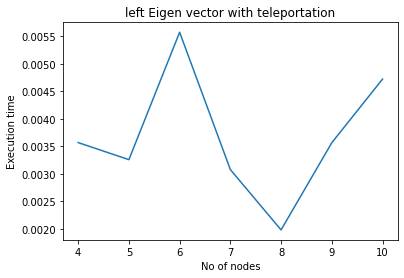

In [ ]:
time=[0.0035684389999914856,0.003257834000010007,0.005574124999952801,0.003077531000030831,0.001980653000032362,0.0035660819999066007,0.004722094000044308]
nodes=[4,5,6,7,8,9,10]
plt.plot(nodes,time)
plt.title("left Eigen vector with teleportation")
plt.xlabel("No of nodes")
plt.ylabel("Execution time")

Text(0, 0.5, 'Execution time')

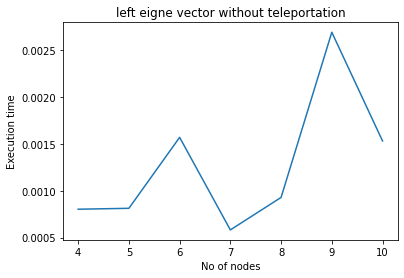

In [ ]:
time=[0.0008033179999529239,0.0008129400000598253,0.001571034999983567,0.000582086999997955,0.0009293519999573618,0.0026942879999296565,0.0015324850000979495]
nodes=[4,5,6,7,8,9,10]
plt.plot(nodes,time)
plt.title("left eigen vector without teleportation")
plt.xlabel("No of nodes")
plt.ylabel("Execution time")

Text(0, 0.5, 'Execution time')

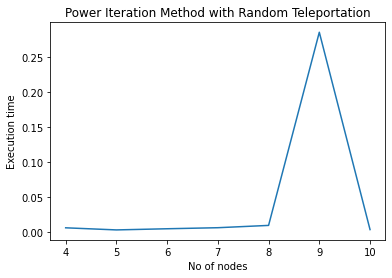

In [ ]:
time=[0.005907283999931678,0.002893822000032742, 0.0045467559999679,0.006043257999976959,0.009331112000040775,0.28518325100003494,0.0033650339998985146]
nodes=[4,5,6,7,8,9,10]
plt.plot(nodes,time)
plt.title("Power Iteration Method with Random Teleportation")
plt.xlabel("No of nodes")
plt.ylabel("Execution time")

Text(0, 0.5, 'execution time')

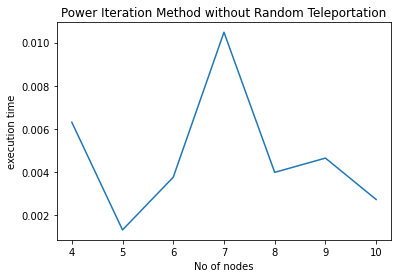

In [ ]:
time=[0.0063026819998412975,0.0013057549999757612,0.0037510829999973794,0.010479972999974052,0.003976760000000468,0.004639176999944539,0.0027171709998583538]
nodes=[4,5,6,7,8,9,10]
plt.plot(nodes,time)
plt.title("Power Iteration Method without Random Teleportation")
plt.xlabel("No of nodes")
plt.ylabel("execution time")